# Introduction and Setup

## Section 0.0 Basic Setup 

Here we will call some basic libraries that will allow us to write equations in a simple and consistent way. In this case we will use the Latex library system (mathjax) to render equations etc.

In [1]:
from IPython.display import display, Math, Latex

After calling this simple library we can create the following nice equations using the Latex environment.  For example the eqaution of intetest for us to use today is the following.

In [2]:
%%latex
\begin{align}
f_n(n) = \frac{n}{2\pi} \sqrt{\frac{{m_0}{k_h}}{g h L}}
\end{align}

<IPython.core.display.Latex object>

## Section 1.0 Getting Symbolic Derivatives

In this document we will work out the error in a a fucntion whos variables which themselves contain error (s).  In particular we will work out the error in a simple frequency fucntion in a standing wave problem.  The problem is a simple physics resutl for the 1D fixed end string problem.

## Section 2.0 Setup For Symbolic Calculation

In this section we set up the sympy enviroment within Python so that we can compute the correct calculations needed to find out result.  On very important note here is that each symbolic result can be copied as Latex code and pasted into a document for publication.  This of course assumes that your document is not what you want to publish in the first place.  

In [6]:
from __future__ import division
from sympy import *
x, h, L, m, da, db, dc, dd, rho, theta, r, R = symbols('x h L m da db dc dd rho theta r R')
k, m, n = symbols('k m n', integer=True)
#f, g, h,L = symbols('f g h L', cls=Function)
init_printing(use_unicode=True) # Allows the output to be printed in a Latex like format

## Section 3.0 The Error Equation

In this case we will use the partical differential method for estimation the error.  

In [7]:
%%latex
\begin{align}
\delta f(x) = |f(x)|\sqrt{(\frac{{\partial f}}{\partial{m}} \delta{m})^2+(\frac{{\partial f}}{\partial{L}} \delta{L})^2+(\frac{{\partial f}}{\partial{k}} \delta{k})^2+(\frac{{\partial f}}{\partial{h}} \delta{h})^2}
\end{align}

<IPython.core.display.Latex object>

In order to realize this as an actual equation that we can take derivatives of we must first define the fucntion using the sympy notation.

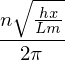

In [8]:
f = (n/(2*pi)) *sqrt((x*h)/(L*m))
f

Now that we have defined the function that we wish to take derivatives of we can now calculate each derivative all at once or one at a time.  Here I will do the calcuation one at a time so that its easy to see what going on.  

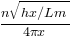

In [15]:
a = diff(f,x)
a

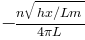

In [16]:
b = diff(f,L)
b

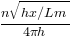

In [17]:
c = diff(f,h)
c

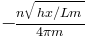

In [18]:
d = diff(f,m)
d

Given that we have all of the derivatives in this system we can now construct the complete function as follows.  Note that the governing equation used here is from Taylors book on error analysis.  This fucntion may be used for any error estimation so long as the relative error between any one measured value and its error is less than one.


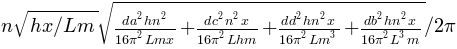

In [19]:
df = f*sqrt((a*da)**2+(b*db)**2+(c*dc)**2+(d*dd)**2)
df

# Section (4.0) Evaluation of the Symbolic Result

Here we will use the "subs" expresion to replace varibles with numbers.  In that subs function we must assing values to each of the variables in the equation.  This will result in a numerical expression that must be evalueted. 

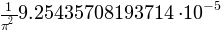

In [20]:
df0 = df.subs([(n,1),(L,10.0),(x,.025),(m , .250),(h,.13),(da,.01),(db,1),(dd,.02), (dc,0.05)])
df0

Now that we have a numerical result we must tell Python to reduce it to a single numerical answer by unsing the evalf function as follows.  Notice that the thing we are evaluating must come first.

In [21]:
df0.evalf()